# Corporate Decarbonization Research
---

### Import modules

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

### Table of Contents

**[Section 1) Loading and Cleaning](#section-1-loading-and-cleaning)**
- Loading the Raw Data
- Helper Functions
- More Data Cleaning

**[Section 2) EDA and Summary Statistics](#section-2-eda-and-summary-statistics)**
- Data Dictionary
- Cross-sector EDA

**[Section 3) Visualizations](#section-3-visualizations)**
- CDP Submissions
- Cross-sector Charts
- Scatter Plots
- Company Emissions Charts
- Net-Zero Charts

**[Section 4) Conclusion](#section-4---conclusion)**
- What we learned
- Next Steps
- Collaboration efforts

---

# SECTION 1) Loading and Cleaning

## Loading the Raw Data

*In this section of the notebook, I will be importing our data and performing some preliminary cleaning/standardizing of our datasets to create separate DataFrames for each sector and an aggregated DataFrame containing all sectors. More data cleaning will be performed after the **Helper Functions** section.*

In [9]:
# load in data

foodag = pd.read_csv('data/foodag.csv')
energy = pd.read_csv('data/energy.csv')
auto = pd.read_csv('data/auto.csv')
tech = pd.read_csv('data/tech.csv')


In [10]:
# Add sector columns to concatenate df's

foodag['SECTOR'] = ['Food & Agriculture'] * len(foodag['COMPANY NAME'])
energy['SECTOR'] = ['Energy'] * len(energy['COMPANY NAME'])
auto['SECTOR'] = ['Auto'] * len(auto['COMPANY NAME'])
tech['SECTOR'] = ['Tech'] * len(tech['COMPANY NAME'])
foodag.shape, energy.shape, auto.shape, tech.shape


((45, 15), (65, 15), (71, 16), (35, 15))

In [11]:
# clean tech to standardize columns across all df's, shorten CI column name

tech = tech.rename(columns={'CARBON INTENSITY\n(Scope 1 & 2 g CO2e/ $ Sales) \ncalculated' :
'CARBON INTENSITY\n(Scope 1 & 2 g CO2e / $ Sales)'})

df_array = [foodag, energy, auto, tech]
for df in df_array:
    df.rename(columns={'CARBON INTENSITY\n(Scope 1 & 2 g CO2e / $ Sales)': 'CARBON INTENSITY'}, inplace=True)


In [12]:
# concatenate dataframes together

sectors = pd.concat([foodag, energy, auto, tech])
sectors = sectors.drop(columns='SCOPE 1 + SCOPE 2 EMISSIONS')
sectors.shape

(216, 15)

### *To access a dataset containing all sectors, use the `sectors` DataFrame. To acccess individual sectors, choose from `foodag`, `tech`, `auto`, and `energy`.*

### `sectors`

In [13]:
# show sectors

sectors.head()

,COMPANY NAME,YEAR,SCOPE 1,SCOPE 2 (location-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CURRENCY,CARBON INTENSITY,COUNTRY OF ORIGIN,SUBMIT TO CDP,SBTi TARGET SET?,SBTI COMMITMENTS,NET-ZERO TARGETS,SECTOR
0,Anheuser-Busch InBev,2018,3700760.0,2383505.0,24431839.0,30516104.0,54619.0,USD,111.39,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture
1,Anheuser-Busch InBev,2019,3600710.0,2215902.0,26484447.0,32301059.0,52329.0,USD,111.15,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture
2,Anheuser-Busch InBev,2020,3081905.0,2227758.0,23652933.0,28962596.0,46881.0,USD,113.26,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture
3,Anheuser-Busch InBev,2021,2953896.0,2243990.0,26527444.0,31725330.0,54304.0,USD,95.72,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture
4,Anheuser-Busch InBev,2022,2843883.0,2029211.0,24136111.0,29009205.0,57786.0,USD,84.33,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture


### Example Sector DataFrame: `foodag`

In [14]:
# show food and ag

foodag.head()

,COMPANY NAME,YEAR,SCOPE 1,SCOPE 2 (location-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CURRENCY,CARBON INTENSITY,COUNTRY OF ORIGIN,SUBMIT TO CDP,SBTi TARGET SET?,SBTI COMMITMENTS,NET-ZERO TARGETS,SECTOR
0,Anheuser-Busch InBev,2018,3700760,2383505,24431839,30516104,54619,USD,111.39,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture
1,Anheuser-Busch InBev,2019,3600710,2215902,26484447,32301059,52329,USD,111.15,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture
2,Anheuser-Busch InBev,2020,3081905,2227758,23652933,28962596,46881,USD,113.26,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture
3,Anheuser-Busch InBev,2021,2953896,2243990,26527444,31725330,54304,USD,95.72,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture
4,Anheuser-Busch InBev,2022,2843883,2029211,24136111,29009205,57786,USD,84.33,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture


In [15]:
# scratch work code cell, replace elipses with any code you'd like to try

sectors['CURRENCY'].value_counts()

USD    98
EUR    39
RMB    17
JPY    12
GBP    10
KRW    10
RUB     9
CHF     5
DKK     5
TWD     5
Name: CURRENCY, dtype: int64

---

## Helper Functions

*This section will contain any functions used to generate graphs, standardize columns, etc.*

In [16]:
# convert revenue's to USD

def toUSD(i):
    dic = {
    'AUD': 0.75,   # 1 AUD to USD
    'CAD': 0.78,   # 1 CAD to USD
    'CHF': 1.09,   # 1 CHF to USD
    'DKK': 0.15,   # 1 DKK to USD
    'EUR': 1.16,   # 1 EUR to USD
    'GBP': 1.37,   # 1 GBP to USD
    'JPY': 0.009,  # 1 JPY to USD
    'KRW': 0.0009, # 1 KRW to USD
    'NOK': 0.11,   # 1 NOK to USD
    'RUB': 0.014,  # 1 RUB to USD
    'SEK': 0.11,   # 1 SEK to USD
    'RMB': 7.29,   # 1 RMB to USD
    'TWD' : 0.03,  # 1 TWD to USD
    'USD': 1.0       # No Change    
    }
    if (not pd.isna(i[0])) or (not pd.isna(i[1])):
        return i[0] * dic[i[1]] # The revenue multiplied by the corresponding USD conversion rate

# sectors['Revenue (USD)'] = sectors.apply(toUSD, 'TOTAL REVENUE (miillion $)')  # --- use this code to apply the function in the revenue column when ready

In [17]:
# Function for creating column with [Currency, Revenue]

def currAndRev(df):
    new_col = []
    for i in np.arange(df.shape[0]):
        new_col.append([df['CURRENCY'].values[i], df['TOTAL REVENUE (miillion $)'].values[i]])
    df['REVENUE IN USD'] = new_col

# currAndRev(sectors)


In [18]:
# graph sector summary charts using matplotlib

def graphCoEmissions(df, co_name, years_arr):
    # format plots and add right axis for CI
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    # create x axis array
    years = df.loc[df['COMPANY NAME']==co_name, 'YEAR']

    # create bar chart stacks and CI array
    scope1 = df.loc[df['COMPANY NAME']==co_name, 'SCOPE 1']
    scope2 = df.loc[df['COMPANY NAME']==co_name, 'SCOPE 2 (location-based)']
    scope3 = df.loc[df['COMPANY NAME']==co_name, 'SCOPE 3']
    ci = df.loc[df['COMPANY NAME']==co_name, 'CARBON INTENSITY']

    # plot bar chart
    b1 = ax1.bar(years, scope1, color='navy', label='Scope 1')
    b2 = ax1.bar(years, scope2, bottom=scope1, color='steelblue', label='Scope 2')
    b3 = ax1.bar(years, scope3, bottom=scope1+scope2, color='lightsteelblue', label='Scope 3')

    # plot CI
    l1 = ax2.plot(years, ci, color = 'black', marker = 'o',label='CI')

    # finish formatting plots
    ax1.set_xticks(years_arr)
    ax1.set_ylim(0, max(scope1+scope2+scope3)+9000000)
    ax2.set_ylim(0, max(ci)+20)

    # combine and add legend
    # lines = [b1, b2, b3]
    # labels = ['SCOPE 1','SCOPE 2','SCOPE 3' ]
    # ax1.legend(lines, labels, loc='lower left', bbox_to_anchor=(1, 1))
    # ax2.legend(loc=0)

    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='lower left', bbox_to_anchor=(1, 1))

    # add labels and titles
    plt.suptitle('Annual GHG Emissions', fontsize=14, fontweight='bold')
    plt.title(co_name, fontsize=10)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Carbon Emissions (metric ton CO2e)')
    ax2.set_ylabel('Carbon Intensity (g CO2e / $ million)')

In [19]:
# graph sector summary charts using plotly

def graphCoEmissionsPlotly(df, co_name, years_arr):
    # format plots and add right axis for CI
    # fig, ax1 = plt.subplots()
    # ax2 = ax1.twinx()

    # create x axis array
    years = df.loc[df['COMPANY NAME']==co_name, 'YEAR']

    # create bar chart stacks and CI array
    scope1 = df.loc[df['COMPANY NAME']==co_name, 'SCOPE 1']
    scope2 = df.loc[df['COMPANY NAME']==co_name, 'SCOPE 2 (location-based)']
    scope3 = df.loc[df['COMPANY NAME']==co_name, 'SCOPE 3']
    ci = df.loc[df['COMPANY NAME']==co_name, 'CARBON INTENSITY']


     # create stacked bar chart traces
    trace_scope1 = go.Bar(x=years, y=scope1, name='Scope 1', marker=dict(color='rgba(0, 0, 255, 0.7)'))
    trace_scope2 = go.Bar(x=years, y=scope2, name='Scope 2', marker=dict(color='rgba(0, 255, 0, 0.7)'))
    trace_scope3 = go.Bar(x=years, y=scope3, name='Scope 3', marker=dict(color='rgba(255, 0, 0, 0.7)'))

    # create line chart trace for CI
    trace_ci = go.Scatter(x=years, y=ci, mode='markers+lines', name='Carbon Intensity', yaxis='y2',
                          marker=dict(color='rgba(255, 165, 0, 0.7)'))

    # combine traces into data list
    data = [trace_scope1, trace_scope2, trace_scope3, trace_ci]

    # create layout
    layout = go.Layout(
        title=dict(text=co_name+' - Annual GHG Emissions', x=0.5),
        xaxis=dict(tickvals=years_arr, title='Year'),
        yaxis=dict(title='Carbon Emissions (metric ton CO2e)', range=[0, max(scope1+scope2+scope3)+9000000]),
        yaxis2=dict(title='Carbon Intensity (g CO2e / $ million)', overlaying='y', side='right', range=[0, max(ci)+20]),
        barmode='stack',
        showlegend=True,
        height=650,
        width=800,
        margin=dict(r=1.2)
    )

    # create figure
    fig = go.Figure(data=data, layout=layout)

    # show the figure
    fig.show()

In [20]:
# graph sector totals by company and emissions type

def graph_CosInSectorTotals(df, year, bool=False):
    # define the sector
    sector = df['SECTOR'].unique()[0]

    # filer DataFrame for just the provided year
    data_year = df.loc[df['YEAR']==year,:]

    # plot stacked bar chart
    sns.barplot(x='SCOPE 1', y='COMPANY NAME', data=data_year, color='orange', orient='h', label='Scope 1')
    sns.barplot(x='SCOPE 2 (location-based)', y='COMPANY NAME', data=data_year, color='navy', orient='h', label='Scope 2')
    if bool==False:
        sns.barplot(x='SCOPE 3', y='COMPANY NAME', data=data_year, color='pink', orient='h', label='Scope 3')
    
    # format axes and titles
    plt.xlabel('GHG emissions (metric tons CO2e)')
    plt.ylabel('Company Name')
    if bool==True:
        plt.title('Scope 1 + Scope 2 GHG Emissions in '+str(year)+' - ' +str(sector))
    else:
        plt.title('Total GHG Emissions in '+str(year)+' - ' +str(sector))

---

## More Data Cleaning

*In this section, I am performing the data cleaning which require my **helper functions** to execute.* Make sure that the previous section has been run before proceeding.

In [21]:
# apply and create revenue in USD column

rev_curr = [[sectors['TOTAL REVENUE (miillion $)'].values[i], sectors['CURRENCY'].values[i]] for i in range(sectors.shape[0])]
sectors['REVENUE W/ CURR'] = rev_curr

# create revenue in USD column and drop revenue w/ curr column

sectors['REVENUE IN USD'] = sectors['REVENUE W/ CURR'].apply(toUSD)
sectors = sectors.drop(columns='REVENUE W/ CURR')

sectors.head()

,COMPANY NAME,YEAR,SCOPE 1,SCOPE 2 (location-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CURRENCY,CARBON INTENSITY,COUNTRY OF ORIGIN,SUBMIT TO CDP,SBTi TARGET SET?,SBTI COMMITMENTS,NET-ZERO TARGETS,SECTOR,REVENUE IN USD
0,Anheuser-Busch InBev,2018,3700760.0,2383505.0,24431839.0,30516104.0,54619.0,USD,111.39,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,54619.0
1,Anheuser-Busch InBev,2019,3600710.0,2215902.0,26484447.0,32301059.0,52329.0,USD,111.15,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,52329.0
2,Anheuser-Busch InBev,2020,3081905.0,2227758.0,23652933.0,28962596.0,46881.0,USD,113.26,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,46881.0
3,Anheuser-Busch InBev,2021,2953896.0,2243990.0,26527444.0,31725330.0,54304.0,USD,95.72,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,54304.0
4,Anheuser-Busch InBev,2022,2843883.0,2029211.0,24136111.0,29009205.0,57786.0,USD,84.33,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,57786.0


In [22]:
# creating adjusted CI column after converting ALL revenues to USD

adjusted_ci = ((sectors['SCOPE 1'] + sectors['SCOPE 2 (location-based)']) / sectors['REVENUE IN USD']).round(2)
sectors['Adjusted CI'] = adjusted_ci

sectors.head()

,COMPANY NAME,YEAR,SCOPE 1,SCOPE 2 (location-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CURRENCY,CARBON INTENSITY,COUNTRY OF ORIGIN,SUBMIT TO CDP,SBTi TARGET SET?,SBTI COMMITMENTS,NET-ZERO TARGETS,SECTOR,REVENUE IN USD,Adjusted CI
0,Anheuser-Busch InBev,2018,3700760.0,2383505.0,24431839.0,30516104.0,54619.0,USD,111.39,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,54619.0,111.39
1,Anheuser-Busch InBev,2019,3600710.0,2215902.0,26484447.0,32301059.0,52329.0,USD,111.15,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,52329.0,111.15
2,Anheuser-Busch InBev,2020,3081905.0,2227758.0,23652933.0,28962596.0,46881.0,USD,113.26,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,46881.0,113.26
3,Anheuser-Busch InBev,2021,2953896.0,2243990.0,26527444.0,31725330.0,54304.0,USD,95.72,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,54304.0,95.72
4,Anheuser-Busch InBev,2022,2843883.0,2029211.0,24136111.0,29009205.0,57786.0,USD,84.33,Belgium,Yes,Yes,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,57786.0,84.33


In [24]:
# Replace 'Submit to CDP' values with True and False for performing categorical data analysis

sectors['SUBMIT TO CDP'] = sectors['SUBMIT TO CDP'].replace({
    'Yes' : True,
    'No' : False
})

sectors['SBTi TARGET SET?'] = sectors['SBTi TARGET SET?'].replace({
    'Yes' : True,
    'No' : False
})

sectors.head()

,COMPANY NAME,YEAR,SCOPE 1,SCOPE 2 (location-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CURRENCY,CARBON INTENSITY,COUNTRY OF ORIGIN,SUBMIT TO CDP,SBTi TARGET SET?,SBTI COMMITMENTS,NET-ZERO TARGETS,SECTOR,REVENUE IN USD,Adjusted CI
0,Anheuser-Busch InBev,2018,3700760.0,2383505.0,24431839.0,30516104.0,54619.0,USD,111.39,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,54619.0,111.39
1,Anheuser-Busch InBev,2019,3600710.0,2215902.0,26484447.0,32301059.0,52329.0,USD,111.15,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,52329.0,111.15
2,Anheuser-Busch InBev,2020,3081905.0,2227758.0,23652933.0,28962596.0,46881.0,USD,113.26,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,46881.0,113.26
3,Anheuser-Busch InBev,2021,2953896.0,2243990.0,26527444.0,31725330.0,54304.0,USD,95.72,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,54304.0,95.72
4,Anheuser-Busch InBev,2022,2843883.0,2029211.0,24136111.0,29009205.0,57786.0,USD,84.33,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,57786.0,84.33


In [25]:
sectors.head()

,COMPANY NAME,YEAR,SCOPE 1,SCOPE 2 (location-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CURRENCY,CARBON INTENSITY,COUNTRY OF ORIGIN,SUBMIT TO CDP,SBTi TARGET SET?,SBTI COMMITMENTS,NET-ZERO TARGETS,SECTOR,REVENUE IN USD,Adjusted CI
0,Anheuser-Busch InBev,2018,3700760.0,2383505.0,24431839.0,30516104.0,54619.0,USD,111.39,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,54619.0,111.39
1,Anheuser-Busch InBev,2019,3600710.0,2215902.0,26484447.0,32301059.0,52329.0,USD,111.15,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,52329.0,111.15
2,Anheuser-Busch InBev,2020,3081905.0,2227758.0,23652933.0,28962596.0,46881.0,USD,113.26,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,46881.0,113.26
3,Anheuser-Busch InBev,2021,2953896.0,2243990.0,26527444.0,31725330.0,54304.0,USD,95.72,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,54304.0,95.72
4,Anheuser-Busch InBev,2022,2843883.0,2029211.0,24136111.0,29009205.0,57786.0,USD,84.33,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,57786.0,84.33


In [17]:
load_sectors = sectors.to_csv('data/sectors.csv', index=False)
load_sectors

---

# SECTION 2) EDA and Summary Statistics

## Data Dictionary

| Column Name | Definition | Data Type |
|--------------|:-----:|-----------:|
| Company Name | Name of the company | object |
| Year | Corresponding year of emissions data | int |
| Scope 1 | The company's direct GHG emissions, given in metric tons of carbon dioxide equivalence | float |
| Scope 2 (location-based) | The company's indirect (location-based) GHG emissions, given in metric tons of carbon dioxide equivalence | float |
| Scope 3 | The company's indirect GHG emissions that come from its value chain, given in metric tons of carbon dioxide equivalence | float |
| Total Emissions | Sum of Scope 1, 2, and 3 emissions | float |
| Total Revenue (million $) | The company's total revenue for a given year | float |
| Currency | The currency of the company's total revenue | object |
| Carbon Intensity | Total scope 1 and scope 2 (location-based) emissions per unit of the company's revenue | float |
| Country of Origin | The company's origin country | object |
| Submit to CDP | Boolean indicator of if the company submitted to CDP for the reporting year (True/False) | object |
| SBTi Target Set? | Boolean indicator of if the company has targets approved by SBTi | object |
| SBTI Commitments | A company's net-zero and near-term targets status | object | 
| Net-Zero Targets | A company's net-zero or emissions reductions target(s) | object | 
| Sector | The industry sector of the company | object |



In [27]:
sectors.head()

,COMPANY NAME,YEAR,SCOPE 1,SCOPE 2 (location-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CURRENCY,CARBON INTENSITY,COUNTRY OF ORIGIN,SUBMIT TO CDP,SBTi TARGET SET?,SBTI COMMITMENTS,NET-ZERO TARGETS,SECTOR,REVENUE IN USD,Adjusted CI
0,Anheuser-Busch InBev,2018,3700760.0,2383505.0,24431839.0,30516104.0,54619.0,USD,111.39,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,54619.0,111.39
1,Anheuser-Busch InBev,2019,3600710.0,2215902.0,26484447.0,32301059.0,52329.0,USD,111.15,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,52329.0,111.15
2,Anheuser-Busch InBev,2020,3081905.0,2227758.0,23652933.0,28962596.0,46881.0,USD,113.26,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,46881.0,113.26
3,Anheuser-Busch InBev,2021,2953896.0,2243990.0,26527444.0,31725330.0,54304.0,USD,95.72,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,54304.0,95.72
4,Anheuser-Busch InBev,2022,2843883.0,2029211.0,24136111.0,29009205.0,57786.0,USD,84.33,Belgium,True,True,"[Near-term targets set, net-zero committed]",Net-zero by 2040 across value chain,Food & Agriculture,57786.0,84.33


## Cross-Sector Exploratory Data Analysis (EDA)

*This section is dedicated to data analysis through visualizations and observing general trends in the data across sectors.*

### Looking at average scope, average total emissions, average, total revenue, and average CI by sector.

The GroupBy object created below, sorted in descending order by `TOTAL EMISSIONS`, shows us that **energy** is the highest-emitting sector while **tech** comes last out of our four sectors.

In [28]:
# Average scope and revenue values by sector in descending order of average total emissions

avg_sectors = sectors.groupby('SECTOR').mean(numeric_only=True).drop(columns=['YEAR']).round(0).sort_values(by='TOTAL EMISSIONS', ascending=False)

avg_sectors

,SCOPE 1,SCOPE 2 (location-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CARBON INTENSITY,SBTi TARGET SET?,REVENUE IN USD,Adjusted CI
SECTOR,,,,,,,,,
Energy,49000779.0,7866270.0,425962254.0,384667608.0,329866.0,1164.0,0.0,131235.0,585.0
Auto,1374703.0,2840815.0,225365571.0,229778853.0,1389422.0,41.0,1.0,129654.0,3152.0
Food & Agriculture,1546647.0,1181952.0,39522984.0,42251583.0,44019.0,64.0,1.0,49361.0,59.0
Tech,2482006.0,5799836.0,27005205.0,35287047.0,47142696.0,20.0,1.0,210002.0,65.0


In [31]:
# for later use once revenues have been converted

# rev_summary = sectors.groupby('SECTOR').mean(numeric_only=True).round(0)[['USD REVENUE']].rename(columns={'USD REVENUE' : 'Mean USD Revenue'}).sort_values(by='Mean USD Revenue', ascending=False)
# rev_summary

### A rough look at highest-emitting companies on average

This GroupBy object shows us the highest-emitting companies on average, sorted by average `TOTAL EMISSIONS`. 

*NOTE: This is not a completely reflective ranking because it doesn't take into account the companies that don't report certain scope values (indicated by NaN).*

In [32]:
sectors.groupby('COMPANY NAME').mean(numeric_only=True).drop(columns=['YEAR']).sort_values(by='TOTAL EMISSIONS', ascending=False)

,SCOPE 1,SCOPE 2 (location-based),SCOPE 3,TOTAL EMISSIONS,TOTAL REVENUE (miillion $),CARBON INTENSITY,SBTi TARGET SET?,REVENUE IN USD,Adjusted CI
COMPANY NAME,,,,,,,,,
Shell,6.300000e+07,1.000000e+07,1.056447e+09,1.129447e+09,3.181430e+05,249.320000,0.0,318143.000000,249.320000
Chevron,5.840000e+07,3.400000e+06,1.028200e+09,1.090000e+09,1.569122e+05,427.920000,0.0,156912.200000,427.920000
Gazprom,8.822895e+07,5.827761e+06,1.127929e+09,7.708143e+08,3.554709e+06,NaN,0.0,49765.926000,2421.040000
Toyota,2.272571e+06,4.357166e+06,4.167293e+08,4.233591e+08,2.084658e+05,31.988333,1.0,1876.192500,3554.291667
Volkswagen,4.399641e+06,5.558314e+06,3.906809e+08,4.006388e+08,2.546363e+05,39.433333,1.0,295378.146667,33.993333
BP,4.066000e+07,3.760000e+06,3.437250e+08,3.194000e+08,2.217036e+05,226.910000,0.0,221703.600000,226.910000
Honda,1.223374e+06,3.410813e+06,2.879159e+08,2.925501e+08,1.513838e+07,0.306667,0.0,136245.450000,34.126667
Equinor,1.326715e+07,1.653358e+05,2.762498e+08,2.896823e+08,8.629960e+04,185.380000,0.0,86299.600000,185.380000
Fiat-Chrysler,1.227754e+06,2.414369e+06,2.668018e+08,2.706001e+08,1.365630e+05,27.941667,1.0,158413.080000,24.088333


### Average Emissions by Country of Origin

Now let's take a look at the average emissions by country of origin, still sorting by average `TOTAL EMISSIONS` in descending order.

*NOTE: I am still working on figuring out how to differentate companies with more than one country of origin.*

In [33]:
avg_ByCountry = sectors.groupby('COUNTRY OF ORIGIN').mean(numeric_only=True).drop(columns=['YEAR', 'TOTAL REVENUE (miillion $)']).round(0).sort_values(by='TOTAL EMISSIONS', ascending=False)

avg_ByCountry

,SCOPE 1,SCOPE 2 (location-based),SCOPE 3,TOTAL EMISSIONS,CARBON INTENSITY,SBTi TARGET SET?,REVENUE IN USD,Adjusted CI
COUNTRY OF ORIGIN,,,,,,,,
"United Kingdom, Netherlands",63000000.0,10000000.0,1.056447e+09,1.129447e+09,249.0,0.0,318143.0,249.0
Russsia,74482749.0,12415423.0,7.015146e+08,7.708143e+08,NaN,0.0,49766.0,2421.0
Japan,1747972.0,3883990.0,3.523226e+08,3.579546e+08,16.0,0.0,69061.0,1794.0
United Kingdom,40660000.0,3760000.0,3.437250e+08,3.194000e+08,227.0,0.0,221704.0,227.0
Norway,13267146.0,165336.0,2.762498e+08,2.896823e+08,185.0,0.0,86300.0,185.0
"Italy, United States",1227754.0,2414369.0,2.668018e+08,2.706001e+08,28.0,1.0,158413.0,24.0
Germany,2017265.0,2838729.0,2.017792e+08,2.066352e+08,25.0,1.0,205322.0,21.0
United States,15087459.0,3682030.0,1.773647e+08,1.850489e+08,170.0,1.0,152063.0,172.0
China,38689365.0,13877112.0,9.032162e+07,1.292112e+08,2588.0,0.0,147268.0,430.0


The first row corresponds to **Shell**, last row corresponds to **Molson Coors**.

In [34]:
# scratch work code cell, replace elipses with any code you'd like to try

...

Ellipsis

---

# SECTION 3) Visualizations

### CDP Submission: Who Reported to CDP?

The purpose of this section is to view the proportion of companies across all sectors who reported to CDP.

In [35]:
# Proportion of CDP submissions over number of reports

submission_percentage = (sum(sectors['SUBMIT TO CDP'] == True) / sectors.shape[0]) * 100

print('Across all sectors, ' + str(round(submission_percentage,0))+ '% of companies submitted to cdp')

Across all sectors, 70.0% of companies submitted to cdp


Now we know 70% of our data comes from CDP submissions. To compare CDP submissions per sector visually, I created a **count plot** using `sectors`.

Text(0.5, 1.0, 'Count of CDP Submissions by Sector')

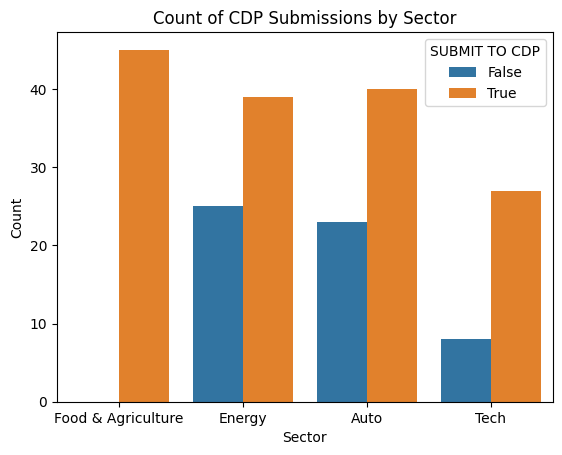

In [36]:
# Plot counts of submissions

sns.countplot(x='SECTOR', hue='SUBMIT TO CDP', data=sectors)
plt.xlabel('Sector')
plt.ylabel('Count')
plt.title('Count of CDP Submissions by Sector')

### Scatter Plots: 
### Scope 1 vs. Scope 2 (location-based) Across All Sectors

This scatterplot reflects the significant difference in emissions emitted by the **energy** sector compared with any other sector. Aside from **energy**, **tech** seems to have relatively higher scope 2 values. Hover over a data point to retrieve information on the represented company and the actual scope values associated. To take a closer look at a certain interval, drag your mouse across the desired interval. To reset the plot, run the code cell again. Any plot generated through Plotly can also be downloaded as a png by clicking on the camera icon on upper right portion of the plot. 

In [37]:
# scope 1 vs scope 2 (location-based)

fig = px.scatter(sectors, x='SCOPE 1', y='SCOPE 2 (location-based)', color='SECTOR', hover_data=['COMPANY NAME'])
fig.update_layout(title='Scope 1 vs. Scope 2 Across All Sectors')
fig.show()

### Scope 2 (location-based) vs. Scope 3


In [38]:
# scope 2 (location-based) vs. scope 3 

fig = px.scatter(sectors, x='SCOPE 2 (location-based)', y='SCOPE 3', color='SECTOR', hover_data=['COMPANY NAME'])
fig.update_layout(title='Scope 2 vs. Scope 3 Across All Sectors')
fig.show()

### Scope 1 vs. Scope 3 

In [39]:
# scope 1 vs. scope 3

fig = px.scatter(sectors, x='SCOPE 1', y='SCOPE 3', color='SECTOR', hover_data=['COMPANY NAME'])
fig.update_layout(title='Scope 1 vs. Scope 3 Across All Sectors')
fig.show()

In [40]:
# scratch work code cell, replace elipses with any code you'd like to try

...

Ellipsis

---

## Cross Sector Charts

*The goal of this section is to generate charts like the ones in the **Cross-Sector** tab of the **emissions** Google Sheet.*

The following charts display the emissions emitted by each company within a sector for a given year. A key observation is that scope 3 swamps scope 1 and 2 emissions. If you would like to exclude scope 3, set bool to True.

In [ ]:
# food and ag totals for 2022

graph_CosInSectorTotals(foodag, 2022, bool=False)

In [ ]:
# energy totals for 2022

graph_CosInSectorTotals(energy, 2022, bool=False)

In [ ]:
# tech totals for 2022

graph_CosInSectorTotals(tech, 2022, bool=False)

In [ ]:
# auto totals for 2022

graph_CosInSectorTotals(auto, 2022, bool=False)

In [ ]:
# scratch work code cell, replace elipses with any code you'd like to try

...

# to play around with the function used to generate graphs above, replace data and year to indicate a DataFrame and year you would like to see
# change bool to True if you would like to exclude scope 3
# uncomment the code below to generate graph

# graph_CosInSectorTotals(data, year, bool=False)
graph_CosInSectorTotals(foodag, 2022, bool=True)

---

## Company Charts by Sector

*The charts generated below follow the format of the charts we generated in Google Sheets. Make sure to run the **Helper Functions** section in order to generate this section properly.*

### Food & Agriculture Emissions Charts

<span style="color:red">TASK: Need to include CI in legend, trying to figure out syntax to do so.</span>

In [ ]:
# graph charts for every company

yrs1 = [2017, 2018, 2019, 2020]
yrs2 = [2018, 2019, 2020, 2021]
yrs3 = [2018, 2019, 2020, 2021, 2022]
yrs4 = [np.arange(2017, 2023)]

for company in foodag['COMPANY NAME'].unique():
    num_years = foodag.loc[foodag['COMPANY NAME']==company, 'YEAR'].shape[0]
    if num_years == 4:
        graphCoEmissions(foodag, company, yrs2)
    else:
        graphCoEmissions(foodag, company, yrs3)

In [ ]:
# another way to plot charts
import plotly.graph_objects as go

for company in foodag['COMPANY NAME'].unique():
    num_years = foodag.loc[foodag['COMPANY NAME']==company, 'YEAR'].shape[0]
    if num_years == 4:
        graphCoEmissionsPlotly(foodag, company, yrs2)
    else:
        graphCoEmissionsPlotly(foodag, company, yrs3)


### Energy Emissions Charts

<span style="color:red">TASK: Exclude years with no data.</span>

In [ ]:
# graph energy charts

for company in energy['COMPANY NAME'].unique():
    num_years = energy.loc[energy['COMPANY NAME']==company, 'YEAR'].shape[0]
    if num_years == 4:
        graphCoEmissionsPlotly(energy, company, yrs2)
    else:
        graphCoEmissionsPlotly(energy, company, yrs3)

### Tech Emissions Charts

In [ ]:
# graph tech charts

for company in tech['COMPANY NAME'].unique():
    num_years = tech.loc[tech['COMPANY NAME']==company, 'YEAR'].shape[0]
    if num_years == 4:
        graphCoEmissionsPlotly(tech, company, yrs2)
    else:
        graphCoEmissionsPlotly(tech, company, yrs3)

### Auto Emissions Charts

In [ ]:
for company in auto['COMPANY NAME'].unique():
    num_years = auto.loc[auto['COMPANY NAME']==company, 'YEAR'].shape[0]
    if num_years == 4:
        graphCoEmissionsPlotly(auto, company, yrs2)
    else:
        graphCoEmissionsPlotly(auto, company, yrs3)

In [ ]:
# scratch work code cell, replace elipses with any code you'd like to try

...

---

## Net-Zero Goals

I'd like to create simple visuals depicting net-zero goals for each firm

---

# Section 4) Conclusion

maybe link paper here?

## What We Learned


## Next Steps

## Collaboration Efforts

Contribute to our live database by filling out this Google Form and report your own emissions data!

---

In [ ]:
e = energy.groupby('YEAR').sum(numeric_only=True)
e['TOTAL EMISSIONS']


In [ ]:
years=[2018,2019,2020,2021,2022]
total_emissions = e['TOTAL EMISSIONS'].values / 1000000

fig, ax = plt.subplots()

ax.bar(years, total_emissions, color='navy')
plt.xlabel('Year')
plt.ylabel('GHG Emissions (million mt $CO_{2}e$)')
plt.title('Energy Sector', fontsize=10)
plt.suptitle('Total GHG Emissions (2018-2022)', fontsize=14, fontweight='bold')
bars = ax.bar(years, total_emissions)
ax.bar_label(bars)

In [ ]:
sectors.head()

In [ ]:
companies = sectors.loc[sectors['SECTOR']=='Food & Agriculture', 'COMPANY NAME'].unique()
companies

In [ ]:
sectors[sectors['SECTOR']=='Auto']

In [ ]:
companies = sectors.loc[sectors['SECTOR']=='Auto', 'COMPANY NAME'].unique()
years = ['2017', '2018','2019', '2020', '2021', '2022']

for co in companies:
    ci = sectors[sectors['COMPANY NAME'] == co]["Adjusted CI"]
    plt.plot(years, ci, label = co, marker='o', markersize=5)
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Year')
plt.ylabel('Carbon Intensity (mt $CO_{2}e$ / mill USD)')
plt.title('Food & Ag Carbon Intensity Over Time (2018-2022)');

In [ ]:
companies = sectors.loc[sectors['SECTOR']=='Auto', 'COMPANY NAME'].unique()
years = ['2017', '2018','2019', '2020', '2021', '2022']

for co in companies:
    total = sectors[sectors['COMPANY NAME'] == co]["SCOPE 1"] /100000
    plt.plot(years, total, label = co, marker='o', markersize=5)
plt.legend(loc = 'upper right', fontsize = 'xx-small')
plt.xlabel('Year')
plt.ylabel('Total Emissions (hundred thousand mt $CO_{2}e$)')
plt.title('Technology', fontsize=10)
plt.suptitle('Scope 2 Emissions Over Time (2018-2022)');

In [ ]:
foodag['COMPANY NAME'].unique()

In [ ]:
graphCoEmissions(auto, "Toyota", [2017, 2018,2019,2020,2021,2022])

In [ ]:
graphCoEmissions(auto, "Daimler/Mercedes", [2017, 2018,2019,2020,2021,2022])

In [ ]:
auto['COMPANY NAME'].unique()

In [ ]:
x = np.arange(2017,2023)
y = sectors.groupby('YEAR').count()['SUBMIT TO CDP']
plt.bar(x, y)
plt.suptitle('Count of CDP Submissions Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Submissions Counts')